In [1]:
import numpy as np


In [2]:
L = np.random.random(100)
sum(L)

49.53212611603917

In [3]:
np.sum(L)

49.5321261160392

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

239 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
980 µs ± 159 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
min(big_array), max(big_array)

(1.1555553506292782e-06, 0.9999995018811987)

In [6]:
np.min(big_array), np.max(big_array)

(1.1555553506292782e-06, 0.9999995018811987)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

138 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
331 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

1.1555553506292782e-06 0.9999995018811987 500044.7886095721


In [9]:
M = np.random.random((3, 4))
print(M)

[[0.75964392 0.21225937 0.63512882 0.66961797]
 [0.47161053 0.43547533 0.08718519 0.90359965]
 [0.44628264 0.05037397 0.66676866 0.69404556]]


In [10]:
M.sum()

6.0319916147871355

In [11]:
M.min()

0.05037397330736404

In [12]:
M.min(axis=0)

array([0.44628264, 0.05037397, 0.08718519, 0.66961797])

In [13]:
M.max(axis=1)

array([0.75964392, 0.90359965, 0.69404556])

In [14]:
with open('president_height.csv') as f:
    for _ in range(4): # first 10 lines
        print(f.readline())

order,name,height(cm)

1,George Washington,189

2,John Adams,170

3,Thomas Jefferson,189



In [15]:
import pandas as pd
data = pd.read_csv('president_height.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [17]:
print('Средняя высота: ', heights.mean())
print('Стандартное отклонение: ', heights.std())
print('Минимальный рост: ', heights.min())
print('Максимальный рост: ', heights.max())

Средняя высота:  179.73809523809524
Стандартное отклонение:  6.931843442745892
Минимальный рост:  163
Максимальный рост:  193


In [18]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Задает стиль графика

Text(0, 0.5, 'number')

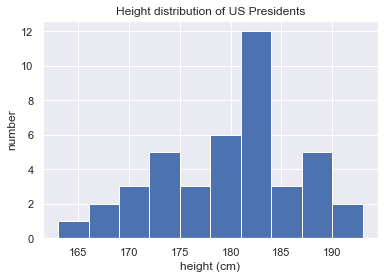

In [20]:
plt.hist(heights)
plt.title('Height distribution of US Presidents')

plt.xlabel('height (cm)')
plt.ylabel('number')